# Package

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

# Global analysis

In [4]:
df_train.head()

,filename,FaceOcclusion,gender,initial_index,gender_id,db_number,count,color,image_width,image_height,...,pixels,pixels_mean,pixels_mean_R,pixels_mean_G,pixels_mean_B,pixels_std,pixels_std_R,pixels_std_G,pixels_std_B,no_color
0,database1/img00011271.jpg,0.019,0.999,0,1,1,1,1,224,224,...,50176,107.747841,132.741510,100.510543,89.991470,83.995129,97.447624,77.424065,68.430032,0
1,database1/img00012471.jpg,0.035,1.000,1,1,1,1,1,224,224,...,50176,115.520176,139.051359,108.359833,99.149334,80.532139,71.841309,79.931149,83.863713,0
2,database1/img00008127.jpg,0.127,0.001,2,0,1,1,1,224,224,...,50176,84.115474,111.611527,81.445791,59.289102,64.644461,73.642430,59.164140,47.261054,0
3,database1/img00008972.jpg,0.014,0.999,3,1,1,1,1,224,224,...,50176,109.190350,134.624302,100.536432,92.410316,48.588847,55.539281,43.584276,33.092015,0
4,database1/img00028187.jpg,0.346,0.982,4,1,1,1,1,224,224,...,50176,100.399567,139.272939,94.241988,67.683773,71.354654,75.586511,61.849424,55.824814,0


In [5]:
# Number of image per database
df_train["db_number"].value_counts()

db_number
3    69996
1    30000
2     1345
Name: count, dtype: int64

In [6]:
df_train.describe()

,FaceOcclusion,gender,initial_index,gender_id,db_number,count,color,image_width,image_height,channels,pixels,pixels_mean,pixels_mean_R,pixels_mean_G,pixels_mean_B,pixels_std,pixels_std_R,pixels_std_G,pixels_std_B,no_color
count,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.0,101341.000000,101341.0,101341.0,101341.0,101341.0,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000,101341.000000
mean,0.087769,0.599738,50671.339093,0.601080,2.394668,1.0,0.861112,224.0,224.0,3.0,50176.0,118.479995,140.003175,114.189435,101.247374,61.933214,63.431461,56.506178,53.930218,0.138888
std,0.090530,0.486110,29256.219556,0.489679,0.911578,0.0,0.345831,0.0,0.0,0.0,0.0,28.268612,30.982464,29.233784,31.654421,12.170900,15.334542,13.686777,14.363803,0.345831
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,224.0,224.0,3.0,50176.0,11.803053,15.256417,3.455855,3.735073,12.473044,7.524053,4.783878,4.644843,0.000000
25%,0.019000,0.001000,25335.000000,0.000000,1.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,98.967773,119.133530,93.817044,78.693140,53.684553,52.564831,46.889945,43.832200,0.000000
50%,0.054000,0.996000,50670.000000,1.000000,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,117.784180,139.984036,113.269591,99.156908,61.896222,63.731753,55.975302,53.047918,0.000000
75%,0.131000,0.999000,76008.000000,1.000000,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,137.238826,161.359395,133.473693,121.706095,70.005724,74.447955,65.499831,63.309697,0.000000
max,1.000000,1.000000,101344.000000,1.000000,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,243.028599,246.325016,243.028599,247.056680,118.609487,118.609487,118.609487,118.609487,1.000000


In [7]:
# Number of image with colour or not
df_train["no_color"].value_counts(normalize=True)*100

no_color
0    86.111248
1    13.888752
Name: proportion, dtype: float64

In [8]:
df_test.describe()

,gender,FaceOcclusion,initial_index,gender_id,db_number,count,color,image_width,image_height,channels,pixels,pixels_mean,pixels_mean_R,pixels_mean_G,pixels_mean_B,pixels_std,pixels_std_R,pixels_std_G,pixels_std_B,no_color
count,30507.0,30507.0,30507.000000,30507.0,30507.000000,30507.0,30507.000000,30507.0,30507.0,30507.0,30507.0,30507.000000,30507.000000,30507.000000,30507.000000,30507.000000,30507.000000,30507.000000,30507.000000,30507.000000
mean,-1.0,-1.0,15253.000000,-1.0,2.983381,1.0,0.807225,224.0,224.0,3.0,50176.0,118.448802,136.866832,114.698492,103.781083,62.043927,63.611212,57.370486,54.869508,0.192775
std,0.0,0.0,8806.756667,0.0,0.127842,0.0,0.394485,0.0,0.0,0.0,0.0,29.742219,31.870830,30.954640,33.638495,12.833957,15.341915,14.343216,15.259588,0.394485
min,-1.0,-1.0,0.000000,-1.0,2.000000,1.0,0.000000,224.0,224.0,3.0,50176.0,9.512868,10.311623,2.264389,2.656350,12.323006,7.700729,1.935243,2.191894,0.000000
25%,-1.0,-1.0,7626.500000,-1.0,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,98.076092,115.400102,93.205497,79.444625,53.325520,52.857800,47.234693,44.018012,0.000000
50%,-1.0,-1.0,15253.000000,-1.0,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,117.850021,136.726782,113.928013,102.073023,61.906535,63.646946,56.765865,54.129026,0.000000
75%,-1.0,-1.0,22879.500000,-1.0,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,138.366835,158.548011,135.661312,126.681989,70.577955,74.381791,66.941730,65.079886,0.000000
max,-1.0,-1.0,30506.000000,-1.0,3.000000,1.0,1.000000,224.0,224.0,3.0,50176.0,242.213150,249.062480,240.405034,247.622369,116.827936,117.048069,116.827936,116.827936,1.000000


# CONCLUSION of IMAGE STATISTICS :
# -----------------------------
- Average face occlusion is 8.8% (median 5.4%) with a standard deviation of 9.1% => really not a gausian distribution !
- 60.1% of images are probably women (gender_id=1) and 39.9% are Men. Information not available in test dataset
- All images can be read, but some are black and white
- All images have the same format (224x224) and 3 channels
- 86.1% of images are in color and 13.9% in black and white (80.7% and 19.3% in test)

# 2. Source (db1, db2, db3), color ratio and gender

## 2.1 Image distribution between source (db1, db2 & db3), color ratio and gender

### Train Data

In [9]:
df_train['women'] = 1 - df_train['gender_id']
df_train['women_occ'] = df_train['FaceOcclusion'] * df_train['women']
df_train['men_occ'] = df_train['FaceOcclusion'] * df_train['gender_id']
stats_db = df_train.groupby('db_number')[['FaceOcclusion','count', 'color', 'no_color','gender_id','men_occ','women','women_occ']].sum()

# add total row
stats_db.loc['total'] = stats_db.sum()

# get mean Face occlusion
stats_db['FaceOcclusion'] = stats_db['FaceOcclusion'] / stats_db['count']
stats_db['men_occ']   = stats_db['men_occ'] / stats_db['gender_id']
stats_db['women_occ'] = stats_db['women_occ'] / stats_db['women']

# format to get ratios in %                  
stats_db['db_ratio'] = (stats_db['count'] / len(df_train)) .map('{:.2%}'.format)
stats_db['color_ratio'] = (stats_db['color'] / stats_db['count']) .map('{:.2%}'.format)
stats_db['no_color_ratio'] = (stats_db['no_color'] / stats_db['count']) .map('{:.2%}'.format)
stats_db['men_ratio'] = ( stats_db['gender_id'] / stats_db['count']) .map('{:.2%}'.format)
stats_db['women_ratio'] = ( stats_db['women'] / stats_db['count']) .map('{:.2%}'.format)
stats_db['Occl_ratio'] = stats_db['FaceOcclusion'].map('{:.2%}'.format)
stats_db['men_occ_ratio'] = stats_db['men_occ'].map('{:.2%}'.format)
stats_db['women_occ_ratio'] = stats_db['women_occ'].map('{:.2%}'.format)
stats_db['|'] = '|'
stats_db = stats_db[['Occl_ratio','|','count', 'db_ratio','|', 'color', 'color_ratio', 'no_color', 'no_color_ratio','|','gender_id','men_ratio','men_occ_ratio','|','women','women_ratio','women_occ_ratio']]

#show stats on train dataset
stats_db

,Occl_ratio,|,count,db_ratio,|,color,color_ratio,no_color,no_color_ratio,|,gender_id,men_ratio,men_occ_ratio,|,women,women_ratio,women_occ_ratio
db_number,,,,,,,,,,,,,,,,,
1,11.42%,|,30000.0,29.60%,|,30000.0,100.00%,0.0,0.00%,|,10845.0,36.15%,7.49%,|,19155.0,63.85%,13.65%
2,12.99%,|,1345.0,1.33%,|,1234.0,91.75%,111.0,8.25%,|,717.0,53.31%,8.93%,|,628.0,46.69%,17.62%
3,7.56%,|,69996.0,69.07%,|,56032.0,80.05%,13964.0,19.95%,|,49352.0,70.51%,5.59%,|,20644.0,29.49%,12.28%
total,8.78%,|,101341.0,100.00%,|,87266.0,86.11%,14075.0,13.89%,|,60914.0,60.11%,5.97%,|,40427.0,39.89%,13.01%


# TRAIN - ANALYSIS OF FACE OCCLUSION, COLOR AND GENDER
# ----------------------------------------------------------
##  The 3 data sources do not share the same distribution in many regards :
- face occlusion is 8.78% overall. Higher in db1 and db2 (11.4% and 13.0%), and lower in db3 (7.6%), partly due to gender distribution
- face occlusion is and lower for men (6.0%) and than for women (13%). Particularly high in db2 (13.0% overall and 17.6% for women)
- gender is imbalanced with 60% of men and 40% of women. With strong disparities between databases (db1 has 36%-64% distribution, db2 has 53%-47% and db3 has 70%-30%)
- color images account for 86.1% of images: db1 has only color images, whereas db2 and db3 contain 8.2% and 20% respectively of black and white images (with all 3 channels identical)

## In summary for each database in the train dataset :
- db1 : high face occlusion (11.42% overall and 13.7.% for women), mainly women (34%-64%), only color images
- db2 : very high face occlusion (13.0% overall and 17.6% for women), almost balanced gender (53%-47%), 8.2% black and white images
- db3 : low face occlusion (7.6% overall and 12.3% for women), mainly men (71%-29%), 20% black and white images

### Test Data

In [10]:
stats_test_db = df_test.groupby('db_number')[['count', 'color', 'no_color']].sum()
stats_test_db.loc['total'] = stats_test_db.sum()
stats_test_db['db_ratio'] = (stats_test_db['count'] / len(df_test)) .map('{:.2%}'.format)
stats_test_db['color_ratio'] = (stats_test_db['color'] / stats_test_db['count']) .map('{:.2%}'.format)
stats_test_db['no_color_ratio'] = (stats_test_db['no_color'] / stats_test_db['count']) .map('{:.2%}'.format)
stats_test_db['|'] = '|'
stats_test_db = stats_test_db[['count', 'db_ratio','|', 'color', 'color_ratio', 'no_color', 'no_color_ratio','|']]
stats_test_db

,count,db_ratio,|,color,color_ratio,no_color,no_color_ratio,|
db_number,,,,,,,,
2,507,1.66%,|,475,93.69%,32,6.31%,|
3,30000,98.34%,|,24151,80.50%,5849,19.50%,|
total,30507,100.00%,|,24626,80.72%,5881,19.28%,|


# CONCLUSION OF ANALYSIS OF TEST DATASET
# --------------------------------------

- db 3 composed almost all of the test dataset (98.3%), db2 only 1.7% and db1 is absent
- slighlty lower proportion of color images (81%) in test dataset versus train dataset (86%)

- gender is unknown in the test dataset, but could be estimated by training a model from the train dataset and applying it to the test dataset
- Need to take into account the differences in distribution between train and test datasets when training the model
- need to balance datasets (data augmentation, oversampling, undersampling, etc.) or apply wieghts in the training process
- it will be interesting to train a black and white model and a color model and combine the predictions, as pixel distribution will be very different
- it could be interesting to train men and women models separately, as face occlusion levels are very different between them
 
- models all together to train if crossing gender with color and black and white images

## 2.2/ Level of Face occlusion by gender

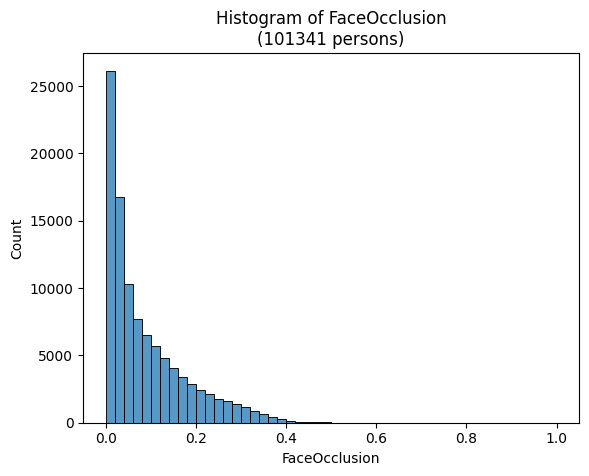

In [15]:
# Plot histogram of Faceocclusion
n = df_train.shape[0]
plt.figure()
sns.histplot(df_train['FaceOcclusion'], bins=50)
plt.title('Histogram of FaceOcclusion\n('+str(n)+' persons)')
plt.show()

In [16]:
df_train["gender_id"].value_counts()

gender_id
1    60914
0    40427
Name: count, dtype: int64

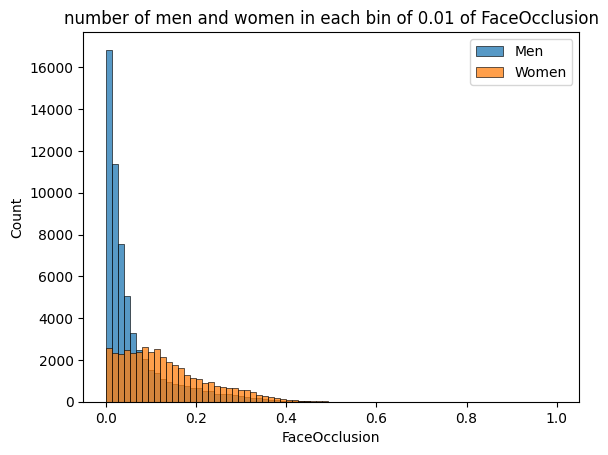

In [17]:
# Distribution of the variable per gender
n_bins = 100
men = df_train[df_train['gender_id'] == 1]
women = df_train[df_train['gender_id'] == 0]

fig = plt.figure()
plt.title('number of men and women in each bin of '+ str(1/n_bins)+' of FaceOcclusion')
sns.histplot(men["FaceOcclusion"], label = "Men", bins = 75)
sns.histplot(women["FaceOcclusion"], label = "Women", bins = 75)
plt.legend()
plt.show()

# CONCLUSION
- Very strong inbalance in face occlusion levels between men and women. In general, women tend to have higher face occlusion than men in the dataset.
- => need to use wights in the loss function to take into account the inbalance in face occlusion levels between
- and also the custom score wieght (1/30 + GT_i) which will give more importance to women with overall higher occlusion levels. where GT_i is the ground truth occlusion level for individual i.

# 3. Pixel distribution for color images vs grayscale images

The next code analyzes the distribution and characteristics of black-and-white vs color photos, broken down by gender, focusing on:
- Number of samples ; 
- Face occlusion level ; 
- Image brightness (average pixel values, overall and per channel).

In [18]:
# detail of black and white photos by gender
stats_bw_gender = df_train.groupby(['color','gender_id'])[['count','gender_id','FaceOcclusion','pixels_mean','pixels_mean_R','pixels_mean_G','pixels_mean_B']].sum()

# add a total row, total men and total women
stats_bw_gender.loc['total'] = stats_bw_gender.sum()
stats_bw_gender.loc['total women'] = stats_bw_gender[stats_bw_gender['gender_id'] == 0].sum()
stats_bw_gender.loc['total men'] = stats_bw_gender.loc['total'] - stats_bw_gender.loc['total women']
stats_bw_gender['FaceOcclusion'] = stats_bw_gender['FaceOcclusion'] / stats_bw_gender['count']
stats_bw_gender['pixels_mean'] = stats_bw_gender['pixels_mean'] / stats_bw_gender['count']
stats_bw_gender['pixels_mean_R'] = stats_bw_gender['pixels_mean_R'] / stats_bw_gender['count']
stats_bw_gender['pixels_mean_G'] = stats_bw_gender['pixels_mean_B'] / stats_bw_gender['count']
stats_bw_gender['pixels_mean_B'] = stats_bw_gender['pixels_mean_B'] / stats_bw_gender['count']
stats_bw_gender['Occl_ratio'] = stats_bw_gender['FaceOcclusion'].map('{:.2%}'.format)
stats_bw_gender = pd.DataFrame(stats_bw_gender)

new_index_names = ['greyscale + woman','greyscale + man','color + woman', 'color + man', 'total', 'total women', 'total men']
stats_bw_gender.index = new_index_names

C:\Users\Mita\AppData\Local\Temp\ipykernel_22280\1662173899.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (x_all[i], y_all[i]), textcoords="offset points", xytext=(5, 5), ha='center')


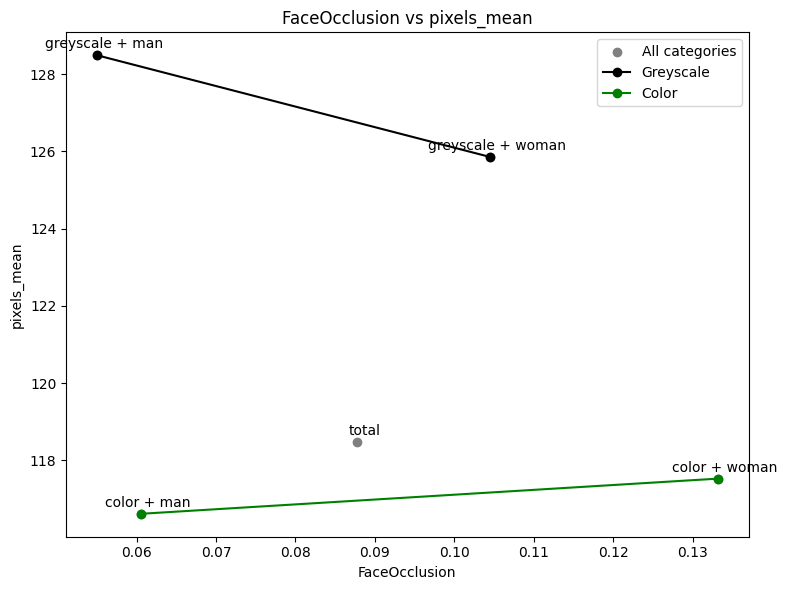

In [19]:
plt.figure(figsize=(8, 6))

# Définir les groupes et couleurs
groups = {
    'Greyscale': (['greyscale + woman', 'greyscale + man'], 'black'),
    'Color':     (['color + woman', 'color + man'], 'green')
}

# Tracer tous les points
x_all = stats_bw_gender['FaceOcclusion'][:5]
y_all = stats_bw_gender['pixels_mean'][:5]
plt.scatter(x_all, y_all, color='gray', label='All categories')

# Tracer les courbes par groupe
for label, (idx, color) in groups.items():
    x = stats_bw_gender.loc[idx, 'FaceOcclusion']
    y = stats_bw_gender.loc[idx, 'pixels_mean']
    plt.plot(x, y, 'o-', color=color, label=label)

# Annotations
for i, txt in enumerate(stats_bw_gender.index[:5]):
    plt.annotate(txt, (x_all[i], y_all[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Mise en forme
plt.xlabel('FaceOcclusion')
plt.ylabel('pixels_mean')
plt.title('FaceOcclusion vs pixels_mean')
plt.legend()
plt.tight_layout()
plt.show()

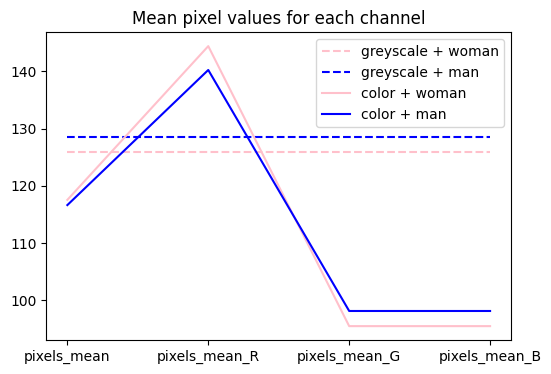

In [20]:
# Plot the pixels mean for each row in the dataframe
colors = ['pink', 'blue', 'pink', 'blue', 'black', 'pink', 'blue']
linestyles = ['--','--','-','-']
plt.figure(figsize=(6, 4))
for i in range(4):
    plt.plot(['pixels_mean', 'pixels_mean_R', 'pixels_mean_G', 'pixels_mean_B'], 
             stats_bw_gender.iloc[i][['pixels_mean', 'pixels_mean_R', 'pixels_mean_G', 'pixels_mean_B']], 
             label=stats_bw_gender.index[i],
             color = colors[i],
             linestyle=linestyles[i])
plt.legend()
plt.title('Mean pixel values for each channel')
plt.show()

In [21]:
stats_bw_gender

,count,gender_id,FaceOcclusion,pixels_mean,pixels_mean_R,pixels_mean_G,pixels_mean_B,Occl_ratio
greyscale + woman,4228.0,0.0,0.104475,125.859255,125.859255,125.859255,125.859255,10.45%
greyscale + man,9847.0,9847.0,0.055025,128.492486,128.492486,128.492486,128.492486,5.50%
color + woman,36199.0,0.0,0.133128,117.525331,144.429354,95.429015,95.429015,13.31%
color + man,51067.0,51067.0,0.060546,116.615098,140.256234,98.080498,98.080498,6.05%
total,101341.0,60914.0,0.087769,118.479995,140.003175,101.247374,101.247374,8.78%
total women,40427.0,0.0,0.130131,118.396923,142.487226,98.611518,98.611518,13.01%
total men,60914.0,60914.0,0.059654,118.535127,138.354576,102.996722,102.996722,5.97%


# MAJOR LEARNINGS FROM PIXEL DISTRIBUTION ANALYSIS
# --------------------------------------------------

## Face occlusion and pixels
- We cannot detect one trend here.
- greyscale images pixel is inversely correlated to Face occlusion
- color images pixel is (positively) correlated to Face occlusion 
- Men have higher pixel than women in grayscale images but lower pixel mean in color images ; 
- Need to train separate models for greyscale and color images, men and women ;

## RGB pixel distribution is very different between greyscale and color images
- greyscale images have the same pixel mean for R, G and B channels (circa 125-130). It's not the case for color images 
- Note : the amplitude is nearly the same for women than men in color images